In [5]:
from radd import build, fit, vis

## Dir

In [6]:
#%mkdir /home/kyle/Dropbox/ELife/ReA_Avg/
%cd /home/kyle/Dropbox/ELife/ReA_Avg/

/home/kyle/Dropbox/ELife/ReA_Avg


## Prepare Data/Params

In [7]:
data = redf_store['redata']
binits = {k: v for k,v in redf_store['rebsl_boot_popt'].items()}
binits['ssv'] = -abs(binits['ssv'])
pinits = {k: v for k,v in redf_store['repnl_boot_popt'].items()}
inits = {k: np.mean([binits[k], pinits[k]]) for k in binits.keys()}

## optimize

In [8]:
m = build.Model(data=data, inits=inits, fit_on='average', depends_on={'a': 'Cond'}, prepare=1)


                  Model is prepared to fit on average reactive data,
                  allowing Boundary Height to vary across
                  levels of Cond (bsl, pnl)  


                  Go to bed 

 


In [10]:
popt, yhat = m.optimize(xtol=.0001, ftol=.0001, ntrials=10000, maxfev=20000)

##visualize fits

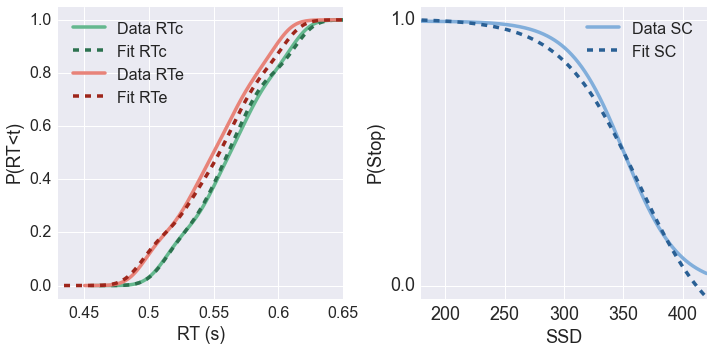

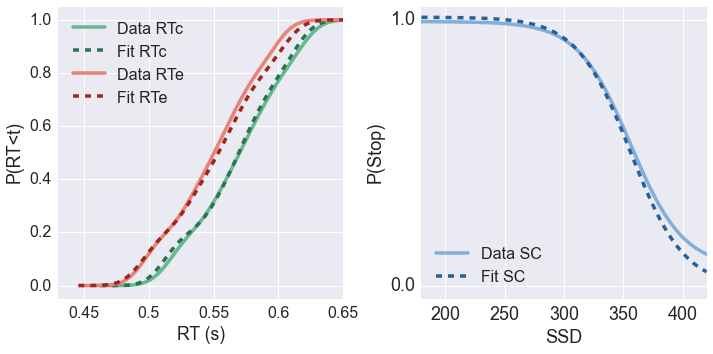

In [11]:
y = build.append_eq(m.y)
yhat = build.append_eq(m.yhat)
for i in range(2):
      vis.plot_fits(y[i], yhat[i], plot_acc=True, savestr=m.labels[i])